# 1. Exploratory Data Analysis (EDA) - Bicep Curl

**Objective:** Load the bicep curl dataset, understand its structure, identify missing values, analyze feature distributions, and visualize key aspects.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1.1 Load Data

In [2]:
BASE_DATA_PATH = "../data/"
TRAIN_DATA_PATH = os.path.join(BASE_DATA_PATH, "train.csv")
TEST_DATA_PATH = os.path.join(BASE_DATA_PATH, "test.csv")

try:
    df_train_raw = pd.read_csv(TRAIN_DATA_PATH)
    df_test_raw = pd.read_csv(TEST_DATA_PATH)
    print("Train and Test datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure train.csv and test.csv are in the '{BASE_DATA_PATH}' directory.")
    df_train_raw = pd.DataFrame()
    df_test_raw = pd.DataFrame()

Train and Test datasets loaded successfully.


## 1.2 Initial Data Inspection

In [3]:
if not df_train_raw.empty:
    print("--- Training Data ---_raw")
    print(f"Shape: {df_train_raw.shape}")
    print("\nFirst 5 rows:")
    display(df_train_raw.head())
    print("\nInfo:")
    df_train_raw.info()
    print("\nDescriptive Statistics:")
    display(df_train_raw.describe().T)
else:
    print("Training data is empty or not loaded.")

if not df_test_raw.empty:
    print("\n--- Test Data ---_raw")
    print(f"Shape: {df_test_raw.shape}")
    print("\nFirst 5 rows:")
    display(df_test_raw.head())
else:
    print("Test data is empty or not loaded.")

--- Training Data ---_raw
Shape: (15372, 37)

First 5 rows:


,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,left_wrist_z,left_wrist_v,left_hip_x,left_hip_y,left_hip_z,left_hip_v,right_hip_x,right_hip_y,right_hip_z,right_hip_v
0,C,0.549027,0.320492,-0.175574,0.992889,0.488670,0.342995,0.132471,0.990275,0.492497,...,0.061884,0.027825,0.431124,0.644671,0.116700,0.946605,0.438680,0.646371,-0.116747,0.974060
1,C,0.540332,0.304887,-0.168256,0.993201,0.488359,0.341853,0.139501,0.990031,0.481190,...,0.071002,0.026019,0.439490,0.651115,0.114084,0.928524,0.441101,0.651813,-0.114092,0.966088
2,C,0.538717,0.301112,-0.178058,0.994154,0.487443,0.341226,0.142286,0.990501,0.479147,...,0.058223,0.025761,0.440429,0.653486,0.113842,0.924844,0.441856,0.654032,-0.113844,0.964290
3,C,0.537699,0.300658,-0.186825,0.994999,0.486305,0.340976,0.138553,0.991070,0.478530,...,0.049269,0.026474,0.441222,0.655565,0.111450,0.927651,0.443048,0.656060,-0.111438,0.965767
4,C,0.536932,0.298658,-0.206978,0.995858,0.485906,0.340850,0.136672,0.991733,0.478530,...,0.049875,0.027647,0.442921,0.656947,0.110279,0.933727,0.444255,0.656951,-0.110262,0.968526



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15372 entries, 0 to 15371
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             15372 non-null  object 
 1   nose_x            15372 non-null  float64
 2   nose_y            15372 non-null  float64
 3   nose_z            15372 non-null  float64
 4   nose_v            15372 non-null  float64
 5   left_shoulder_x   15372 non-null  float64
 6   left_shoulder_y   15372 non-null  float64
 7   left_shoulder_z   15372 non-null  float64
 8   left_shoulder_v   15372 non-null  float64
 9   right_shoulder_x  15372 non-null  float64
 10  right_shoulder_y  15372 non-null  float64
 11  right_shoulder_z  15372 non-null  float64
 12  right_shoulder_v  15372 non-null  float64
 13  right_elbow_x     15372 non-null  float64
 14  right_elbow_y     15372 non-null  float64
 15  right_elbow_z     15372 non-null  float64
 16  right_elbow_v     15372 non-null 

,count,mean,std,min,25%,50%,75%,max
nose_x,15372.0,0.500918,0.049514,0.355567,0.459212,0.504589,0.541784,0.645998
nose_y,15372.0,0.262116,0.051111,0.125292,0.223889,0.264019,0.304879,0.581336
nose_z,15372.0,-0.099334,0.138438,-0.722204,-0.189415,-0.065714,-0.005138,0.374378
nose_v,15372.0,0.994193,0.013442,0.808179,0.994725,0.999362,0.999983,0.999999
left_shoulder_x,15372.0,0.525773,0.059491,0.384465,0.485937,0.526775,0.586608,0.647344
left_shoulder_y,15372.0,0.352126,0.051274,0.218894,0.319704,0.354833,0.387314,0.543683
left_shoulder_z,15372.0,0.009527,0.168737,-0.405424,-0.150593,0.029643,0.164292,0.319467
left_shoulder_v,15372.0,0.998686,0.002463,0.979029,0.998318,0.999921,0.999968,0.999997
right_shoulder_x,15372.0,0.473490,0.054430,0.382001,0.417872,0.473818,0.510937,0.606968
right_shoulder_y,15372.0,0.351894,0.052372,0.210146,0.318591,0.352566,0.388858,0.559406



--- Test Data ---_raw
Shape: (604, 37)

First 5 rows:


,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,left_wrist_z,left_wrist_v,left_hip_x,left_hip_y,left_hip_z,left_hip_v,right_hip_x,right_hip_y,right_hip_z,right_hip_v
0,C,0.615224,0.073991,-0.100585,0.974576,0.544499,0.191445,0.113678,0.994681,0.551744,...,0.043468,0.024029,0.535736,0.549291,0.125539,0.976502,0.538179,0.555343,-0.125400,0.970297
1,C,0.613212,0.095892,-0.108284,0.979423,0.539261,0.194612,0.107388,0.995724,0.546476,...,0.070441,0.025974,0.533957,0.552031,0.124188,0.976415,0.538070,0.559292,-0.124034,0.972220
2,C,0.610413,0.110862,-0.090511,0.978248,0.535853,0.194310,0.129533,0.995985,0.539812,...,0.073368,0.025324,0.531688,0.552534,0.131934,0.974039,0.538991,0.559115,-0.131773,0.969989
3,C,0.609161,0.116677,-0.109990,0.976779,0.536108,0.194416,0.113064,0.996067,0.537499,...,0.056257,0.025142,0.533947,0.551920,0.129026,0.973503,0.539009,0.555925,-0.128898,0.969445
4,C,0.608213,0.130628,-0.092444,0.977312,0.541298,0.196506,0.116941,0.996112,0.536987,...,0.112150,0.025980,0.537309,0.551376,0.117646,0.974252,0.538109,0.554775,-0.117393,0.969354


## 1.3 Missing Value Analysis

In [4]:
if not df_train_raw.empty:
    print("Missing values in Training Data:")
    missing_train = df_train_raw.isnull().sum()
    missing_train = missing_train[missing_train > 0]
    if not missing_train.empty:
        print(missing_train)
        plt.figure(figsize=(10, len(missing_train) * 0.3))
        sns.barplot(x=missing_train.values, y=missing_train.index)
        plt.title('Missing Values in Training Data')
        plt.xlabel('Number of Missing Values')
        plt.show()
    else:
        print("No missing values found in training data.")

if not df_test_raw.empty:
    print("\nMissing values in Test Data:")
    missing_test = df_test_raw.isnull().sum()
    missing_test = missing_test[missing_test > 0]
    if not missing_test.empty:
        print(missing_test)
        plt.figure(figsize=(10, len(missing_test) * 0.3))
        sns.barplot(x=missing_test.values, y=missing_test.index)
        plt.title('Missing Values in Test Data')
        plt.xlabel('Number of Missing Values')
        plt.show()
    else:
        print("No missing values found in test data.")

Missing values in Training Data:
No missing values found in training data.

Missing values in Test Data:
No missing values found in test data.


**Observation on Missing Values:**
If there are missing values, especially in landmark coordinates, it might indicate that MediaPipe couldn't detect those landmarks in some frames. This could be due to occlusion, poor lighting, or the person being out of frame. The `extract_arm_features_from_df` function in the original script handles this by checking landmark visibility.

## 1.4 Label Distribution

Label Distribution in Training Data:
label
C    8238
L    7134
Name: count, dtype: int64

Percentage:
label
C    53.590945
L    46.409055
Name: proportion, dtype: float64


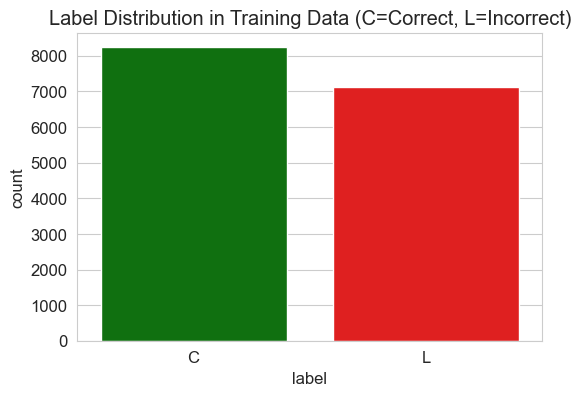


Label Distribution in Test Data:
label
C    339
L    265
Name: count, dtype: int64

Percentage:
label
C    56.125828
L    43.874172
Name: proportion, dtype: float64


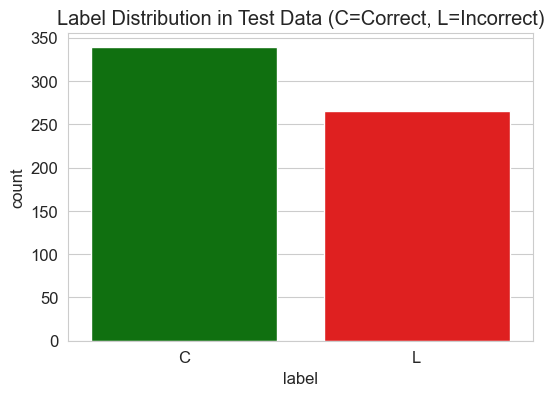

In [5]:
if not df_train_raw.empty and 'label' in df_train_raw.columns:
    print("Label Distribution in Training Data:")
    print(df_train_raw['label'].value_counts())
    print("\nPercentage:")
    print(df_train_raw['label'].value_counts(normalize=True) * 100)
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df_train_raw, palette=['green', 'red'])
    plt.title('Label Distribution in Training Data (C=Correct, L=Incorrect)')
    plt.show()
else:
    print("Label column not found or training data empty.")

if not df_test_raw.empty and 'label' in df_test_raw.columns:
    print("\nLabel Distribution in Test Data:")
    print(df_test_raw['label'].value_counts())
    print("\nPercentage:")
    print(df_test_raw['label'].value_counts(normalize=True) * 100)
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df_test_raw, palette=['green', 'red'])
    plt.title('Label Distribution in Test Data (C=Correct, L=Incorrect)')
    plt.show()
else:
    print("Label column not found or test data empty.")

**Observation on Label Distribution:**
Check for class imbalance. If one class is significantly more frequent than the other, it might affect model training. Techniques like class weighting (used in the original script's RandomForest) or over/under-sampling might be necessary.

## 1.5 Landmark Coordinate and Visibility Distributions


--- Distribution of X Coordinates (Sample) ---


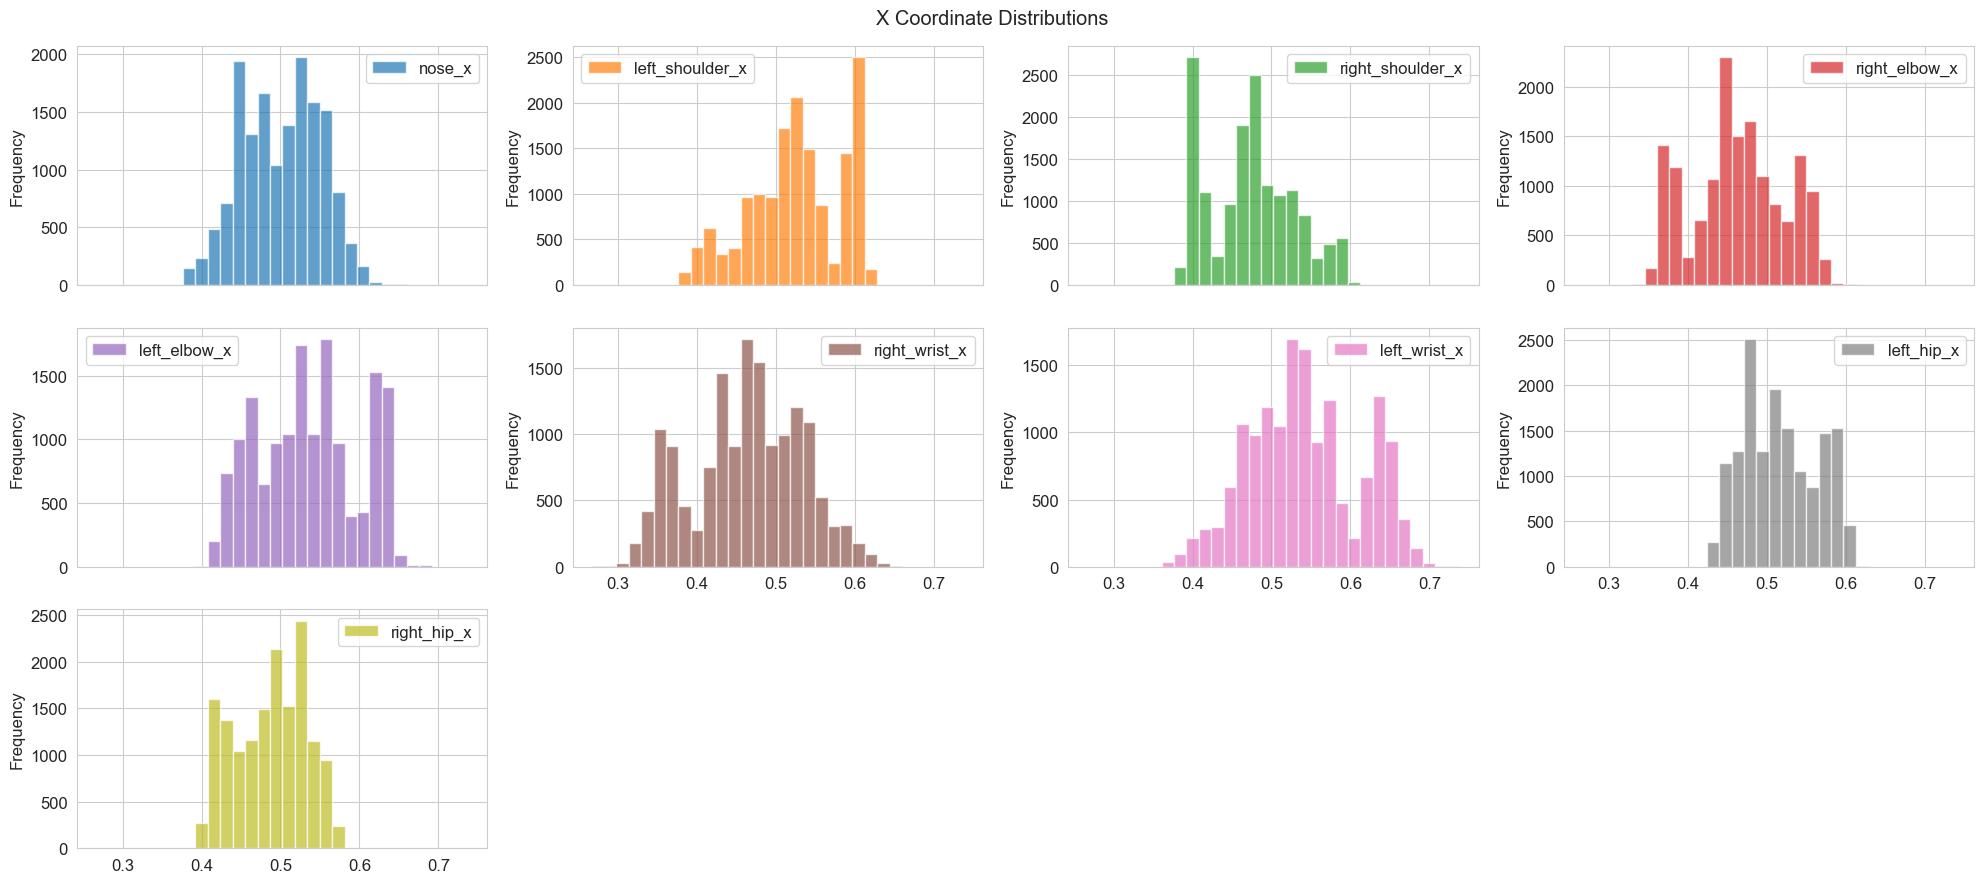


--- Distribution of Y Coordinates (Sample) ---


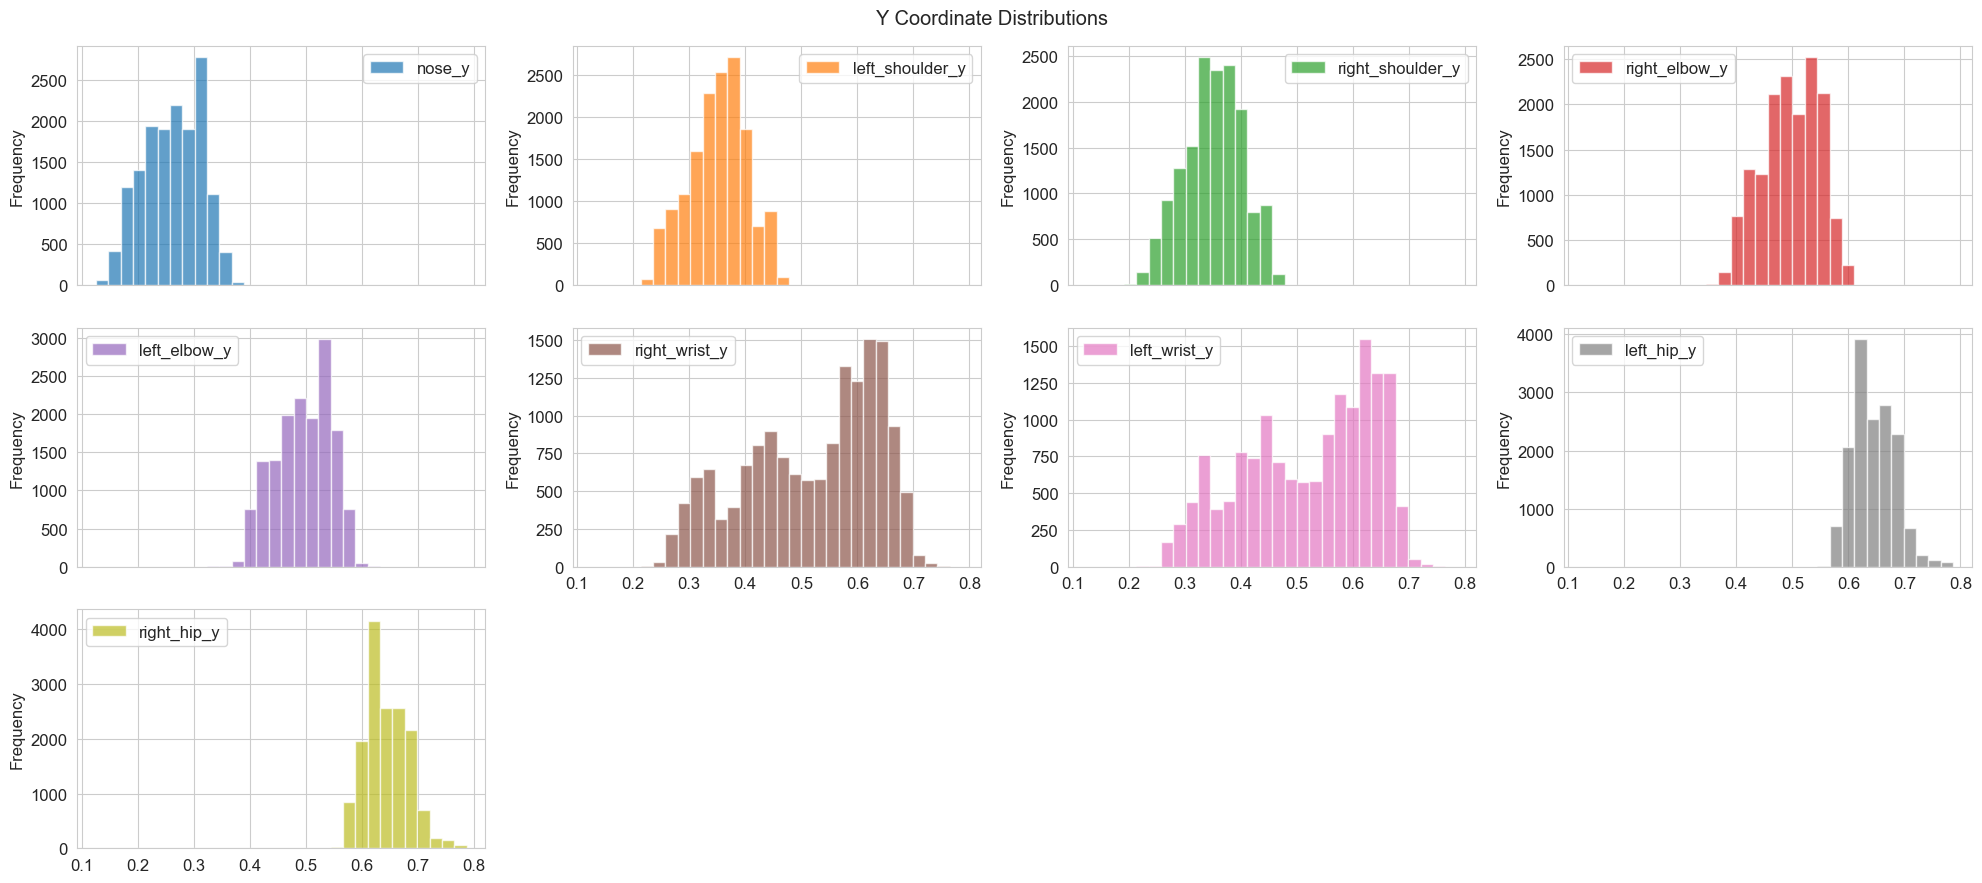


--- Distribution of Visibility Scores ---


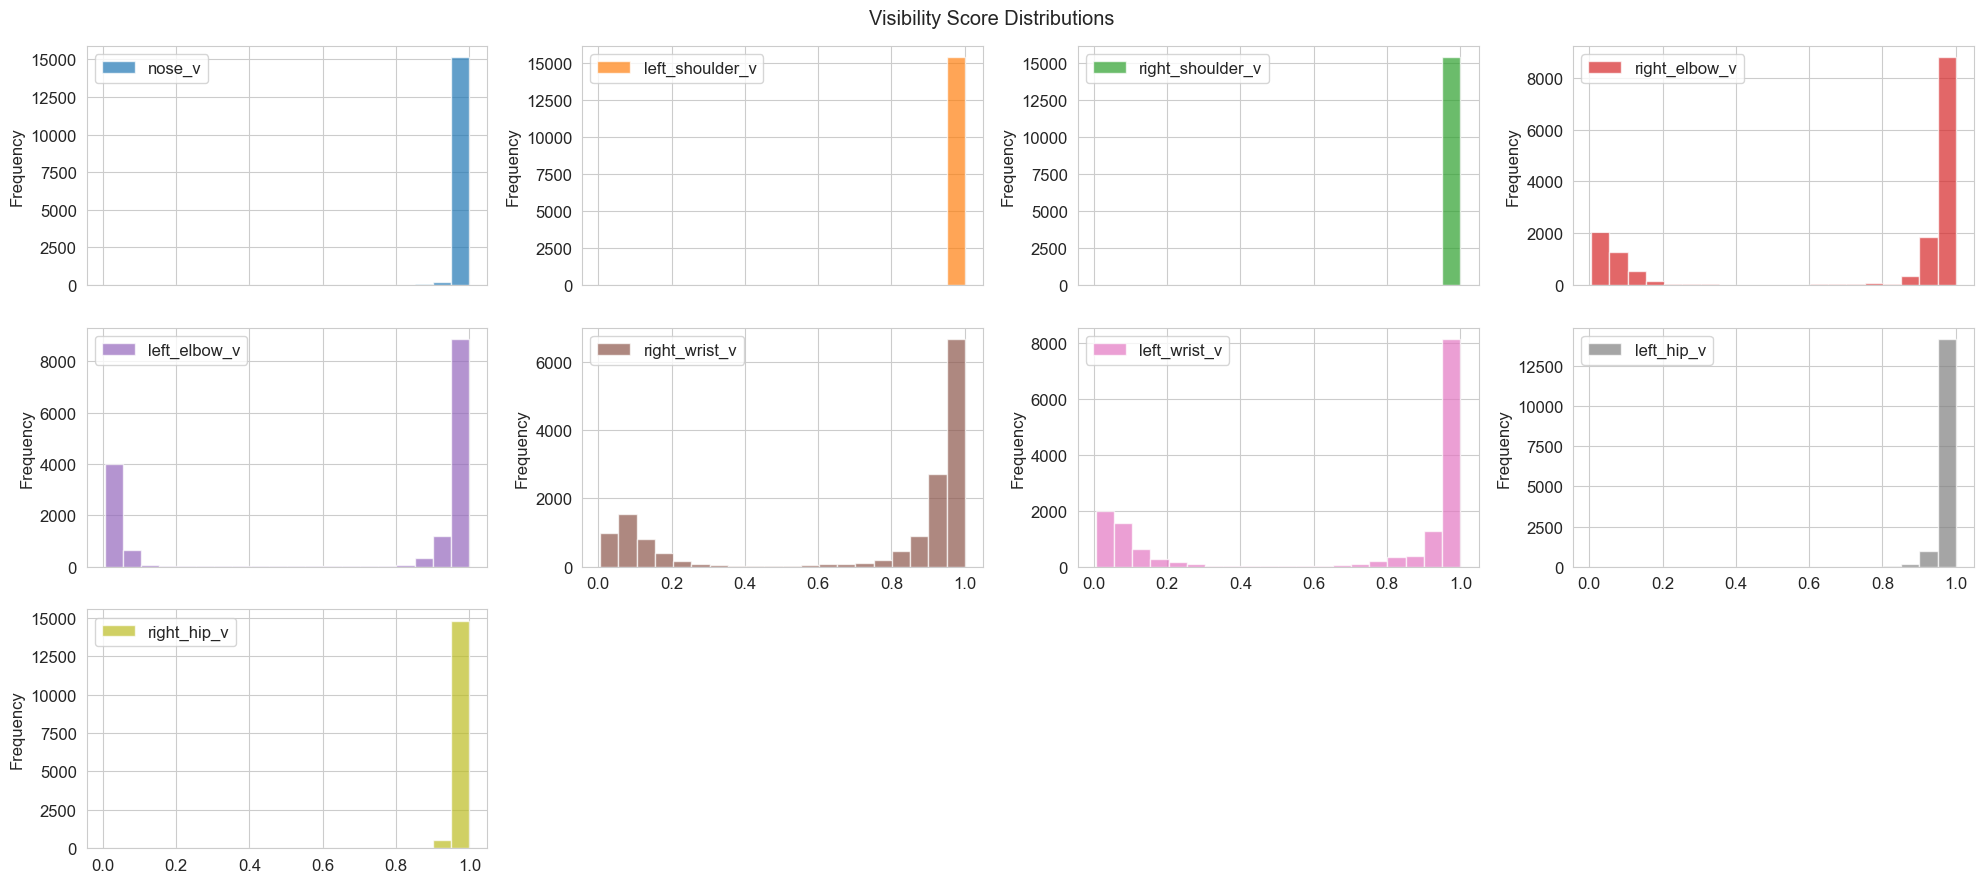

,count,mean,std,min,25%,50%,75%,max
nose_v,15372.0,0.994193,0.013442,0.808179,0.994725,0.999362,0.999983,0.999999
left_shoulder_v,15372.0,0.998686,0.002463,0.979029,0.998318,0.999921,0.999968,0.999997
right_shoulder_v,15372.0,0.999003,0.002055,0.972061,0.998843,0.999827,0.999931,0.999996
right_elbow_v,15372.0,0.721589,0.396356,0.005451,0.155105,0.962983,0.979044,0.999240
left_elbow_v,15372.0,0.681248,0.433290,0.007442,0.050468,0.968206,0.990153,0.999587
right_wrist_v,15372.0,0.715196,0.376128,0.008070,0.228281,0.938422,0.974864,0.999528
left_wrist_v,15372.0,0.684734,0.407801,0.016177,0.124606,0.958445,0.984336,0.999701
left_hip_v,15372.0,0.986487,0.023042,0.808308,0.986950,0.995989,0.998606,0.999991
right_hip_v,15372.0,0.986736,0.015998,0.867890,0.979242,0.993865,0.998020,0.999991


In [6]:
if not df_train_raw.empty:
    # Identify landmark columns (those ending with _x, _y, _v)
    landmark_cols = [col for col in df_train_raw.columns if col.endswith(('_x', '_y', '_v'))]
    coord_cols_x = [col for col in landmark_cols if col.endswith('_x')]
    coord_cols_y = [col for col in landmark_cols if col.endswith('_y')]
    visibility_cols = [col for col in landmark_cols if col.endswith('_v')]

    print("\n--- Distribution of X Coordinates (Sample) ---")
    if coord_cols_x:
        df_train_raw[coord_cols_x].plot(kind='hist', subplots=True, layout=(-1, 4), figsize=(20, max(5, len(coord_cols_x))), bins=30, alpha=0.7, title="X Coordinate Distributions")
        plt.tight_layout()
        plt.show()
    else:
        print("No X coordinate columns found.")

    print("\n--- Distribution of Y Coordinates (Sample) ---")
    if coord_cols_y:
        df_train_raw[coord_cols_y].plot(kind='hist', subplots=True, layout=(-1, 4), figsize=(20, max(5, len(coord_cols_y))), bins=30, alpha=0.7, title="Y Coordinate Distributions")
        plt.tight_layout()
        plt.show()
    else:
        print("No Y coordinate columns found.")

    print("\n--- Distribution of Visibility Scores ---")
    if visibility_cols:
        df_train_raw[visibility_cols].plot(kind='hist', subplots=True, layout=(-1, 4), figsize=(20, max(5, len(visibility_cols))), bins=20, alpha=0.7, title="Visibility Score Distributions")
        plt.tight_layout()
        plt.show()
        
        # Summary statistics for visibility
        display(df_train_raw[visibility_cols].describe().T)
    else:
        print("No visibility columns found.")
else:
    print("Training data is empty, skipping landmark distribution analysis.")

**Observations on Landmark Distributions:**
- **Coordinates (x, y):** These are typically normalized by MediaPipe (0.0 to 1.0). Histograms can show if the subject was generally centered or if certain poses push landmarks to the edges of the frame.
- **Visibility (v):** Scores closer to 1.0 indicate high confidence in landmark detection. Low visibility scores suggest the landmark might be occluded or unreliable. The original script uses a visibility threshold (0.7) for feature extraction, which is a good practice.

## 1.6 Example: Visualizing Key Arm Landmark Relationships (Scatter Plot)

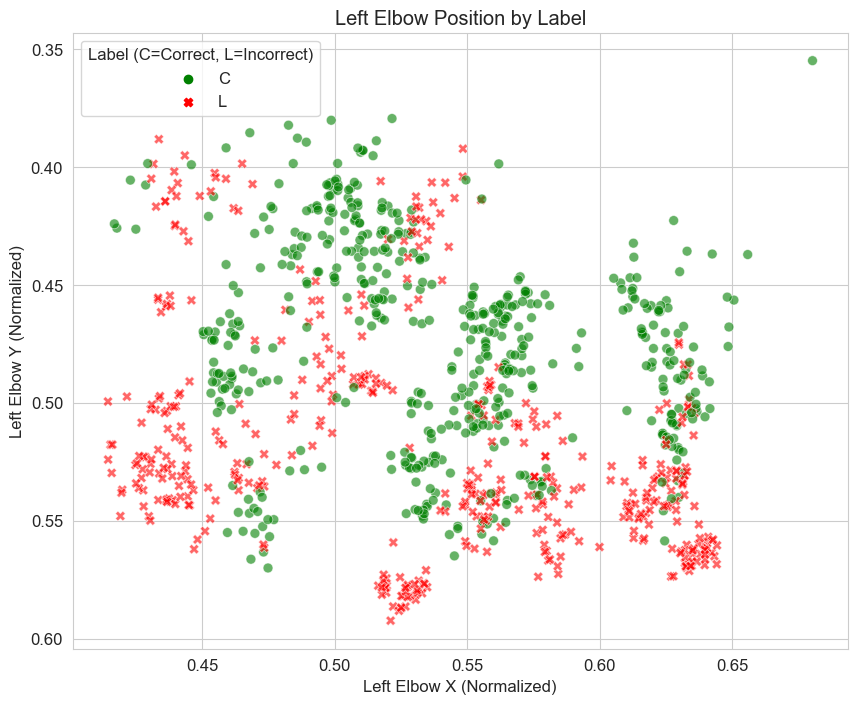

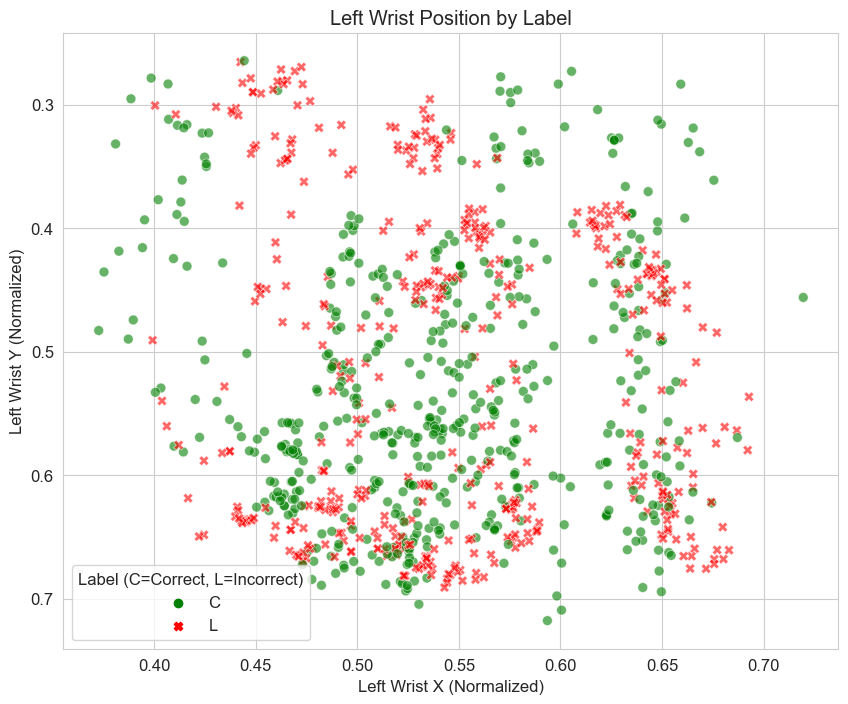

In [7]:
# Let's visualize the relationship between left elbow and left wrist for correct vs. incorrect labels
# This is a simplified view, as angles are more direct features, but can show patterns.
if not df_train_raw.empty and all(c in df_train_raw.columns for c in ['left_elbow_x', 'left_elbow_y', 'left_wrist_x', 'left_wrist_y', 'label']):
    sample_df = df_train_raw.sample(n=min(1000, len(df_train_raw)), random_state=42) # Sample for cleaner plot

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=sample_df, x='left_elbow_x', y='left_elbow_y', hue='label', style='label', s=50, alpha=0.6, palette={'C':'green', 'L':'red'})
    plt.title('Left Elbow Position by Label')
    plt.xlabel('Left Elbow X (Normalized)')
    plt.ylabel('Left Elbow Y (Normalized)')
    plt.gca().invert_yaxis() # Typical image coordinates
    plt.legend(title='Label (C=Correct, L=Incorrect)')
    plt.show()

    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=sample_df, x='left_wrist_x', y='left_wrist_y', hue='label', style='label', s=50, alpha=0.6, palette={'C':'green', 'L':'red'})
    plt.title('Left Wrist Position by Label')
    plt.xlabel('Left Wrist X (Normalized)')
    plt.ylabel('Left Wrist Y (Normalized)')
    plt.gca().invert_yaxis()
    plt.legend(title='Label (C=Correct, L=Incorrect)')
    plt.show()
else:
    print("Required columns for scatter plot not found or training data empty.")

## 1.7 EDA Summary & Next Steps

This initial exploration has provided insights into:
- The structure and size of the training and testing datasets.
- The presence (or absence) of missing values.
- The distribution of labels, highlighting potential class imbalances.
- The general range and distribution of landmark coordinates and their visibility scores.

**Next Steps (in `2_data_preprocessing_and_model_training.ipynb`):**
1.  **Feature Engineering:** Extract meaningful features (angles) from the raw landmark data, considering landmark visibility. This will use the `GeometryUtils`.
2.  **Data Splitting:** The data is already split into train/test CSVs, but we'll process these into feature matrices (X) and target vectors (y).
3.  **Scaling:** Apply feature scaling (e.g., StandardScaler) to standardize the range of input features.
4.  **Model Training:** Train various classification models.
5.  **Evaluation:** Evaluate models using appropriate metrics (accuracy, precision, recall, F1-score, confusion matrix).
6.  **Model Saving:** Save the trained scaler and the best performing model(s).